In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
import numpy as np
import random
import matplotlib.pyplot as plt

seed = 92
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)


device = torch.device("cpu")
print(f"Using device: {device}")


Using device: cpu


In [9]:
print(device)

cpu


In [3]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((48, 48)),                  # Resize all images
    transforms.ToTensor(),                        # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))          # Normalize to [-1, 1]
])

transform_minority = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])



train_dataset = datasets.ImageFolder(
    root = "C:\\Users\\Harshith S G\\OneDrive\\Documents\\Knight codes\\Pes io neural networks\\fer2013\\train",
    transform=transform
)

test_dataset = datasets.ImageFolder(
    root="C:\\Users\\Harshith S G\\OneDrive\\Documents\\Knight codes\\Pes io neural networks\\fer2013\\test"
                                    
    ,transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

num_classes = len(train_dataset.classes)
print(num_classes)



7


In [10]:

class EmotionCNN(nn.Module):

    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.features = nn.Sequential(
         
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
 
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 6 * 6, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = EmotionCNN(num_classes).to(device)

In [11]:
criterion = nn.CrossEntropyLoss()


optimizer = optim.Adam(model.parameters(), lr=0.001)





In [12]:
def predict():
    epochs = 15
    correct  =0
    total = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0        # reset for each epoch
        total = 0          # reset for each epoch
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
        print(f"Accuracy: {(correct / total) * 100:.2f}%")
predict()

Epoch 1/15: 100%|██████████| 449/449 [13:27<00:00,  1.80s/it]


Accuracy: 35.27%


Epoch 2/15: 100%|██████████| 449/449 [03:32<00:00,  2.11it/s]


Accuracy: 47.97%


Epoch 3/15: 100%|██████████| 449/449 [03:09<00:00,  2.37it/s]


Accuracy: 52.57%


Epoch 4/15: 100%|██████████| 449/449 [03:10<00:00,  2.35it/s]


Accuracy: 56.84%


Epoch 5/15: 100%|██████████| 449/449 [03:14<00:00,  2.31it/s]


Accuracy: 59.77%


Epoch 6/15: 100%|██████████| 449/449 [03:10<00:00,  2.35it/s]


Accuracy: 62.43%


Epoch 7/15: 100%|██████████| 449/449 [03:08<00:00,  2.39it/s]


Accuracy: 65.57%


Epoch 8/15: 100%|██████████| 449/449 [03:14<00:00,  2.31it/s]


Accuracy: 68.33%


Epoch 9/15: 100%|██████████| 449/449 [03:06<00:00,  2.41it/s]


Accuracy: 70.88%


Epoch 10/15: 100%|██████████| 449/449 [03:38<00:00,  2.06it/s]


Accuracy: 73.44%


Epoch 11/15: 100%|██████████| 449/449 [03:32<00:00,  2.11it/s]


Accuracy: 75.66%


Epoch 12/15: 100%|██████████| 449/449 [03:07<00:00,  2.39it/s]


Accuracy: 77.77%


Epoch 13/15: 100%|██████████| 449/449 [03:05<00:00,  2.42it/s]


Accuracy: 79.85%


Epoch 14/15: 100%|██████████| 449/449 [03:03<00:00,  2.45it/s]


Accuracy: 81.77%


Epoch 15/15: 100%|██████████| 449/449 [03:03<00:00,  2.45it/s]

Accuracy: 82.52%


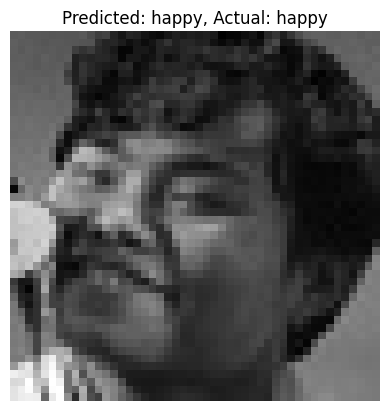

In [13]:
import matplotlib.pyplot as plt
import torch

label_dict = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "neutral",
    5: "sad",
    6: "surprise"
}

def predict_image(model, test_loader, class_name, device):
    model.eval()

    # Find class index for requested class name
    target_label = None
    for k, v in label_dict.items():
        if v == class_name:
            target_label = k
            break

    if target_label is None:
        print("Class not found!")
        return

    # Loop until we find an image with that label
    for images, labels in test_loader:
        for i in range(len(labels)):
            if labels[i].item() == target_label:
                image = images[i+1].to(device)
                label = labels[i+1].item()


                with torch.no_grad():
                    outputs = model(image.unsqueeze(0))
                    _, predicted = torch.max(outputs, 1)
                    predicted = predicted.item()

                plt.imshow(image.squeeze(), cmap='gray')
                plt.title(f"Predicted: {label_dict[predicted]}, Actual: {label_dict[label]}")
                plt.axis('off')
                plt.show()
                return  # show just one image

    print("No image from that class found in the test loader.")

predict_image(model, test_loader, "happy","cpu")